# Galaxus home page stats

In [30]:
import pandas as pd
import numpy as np

## Load data set

In [31]:
# import dataframe from CSV file
df = pd.read_csv('data.csv', names=['date', 'time', 'latency', 'details', 'cache', 'esent', 'esent_details', 'server', 'es_index', 'es_template'])

# convert datetime from string to actual datetime
df['datetime'] = pd.to_datetime(df['date']+' '+df['time'])

df

,date,time,latency,details,cache,esent,esent_details,server,es_index,es_template,datetime
0,2016-11-09,22:36:00,298,20Q 58ms 53E 0T 38ms 21max,0,4,66,SRV-WEB12,v3,v1,2016-11-09 22:36:00
1,2016-11-09,22:37:00,498,20Q 110ms 53E 0T 30ms 16max,0,6,66,SRV-WEB12,v3,v1,2016-11-09 22:37:00
2,2016-11-09,22:38:00,413,20Q 86ms 53E 0T 45ms 33max,0,5,66,SRV-WEB13,v3,v1,2016-11-09 22:38:00
3,2016-11-09,22:39:00,329,20Q 64ms 53E 0T 36ms 19max,0,4,66,SRV-WEB11,v3,v1,2016-11-09 22:39:00
4,2016-11-09,22:40:00,270,19Q 40ms 53E 0T 36ms 18max,0,4,66,SRV-WEB12,v3,v1,2016-11-09 22:40:00
5,2016-11-09,22:41:00,409,20Q 55ms 53E 0T 33ms 18max,0,5,66,SRV-WEB12,v3,v1,2016-11-09 22:41:00
6,2016-11-09,22:42:01,206,20Q 52ms 53E 0T 23ms 12max,0,3,66,SRV-WEB13,v3,v1,2016-11-09 22:42:01
7,2016-11-09,22:43:00,342,19Q 45ms 53E 0T 36ms 18max,0,6,66,SRV-WEB12,v3,v1,2016-11-09 22:43:00
8,2016-11-09,22:44:00,338,20Q 115ms 53E 0T 27ms 14max,0,4,66,SRV-WEB11,v3,v1,2016-11-09 22:44:00
9,2016-11-09,22:45:00,247,20Q 47ms 53E 0T 27ms 14max,0,4,66,SRV-WEB11,v3,v1,2016-11-09 22:45:00


In [32]:
df['latency'].describe()

count     9859.000000
mean       390.344558
std       2078.750708
min        109.000000
25%        202.000000
50%        244.000000
75%        302.000000
max      89110.000000
Name: latency, dtype: float64

In [33]:
df['datetime'].describe()

count                    9859
unique                   9859
top       2016-11-10 07:46:00
freq                        1
first     2016-11-09 22:36:00
last      2016-11-21 21:45:00
Name: datetime, dtype: object

## Latency distribution

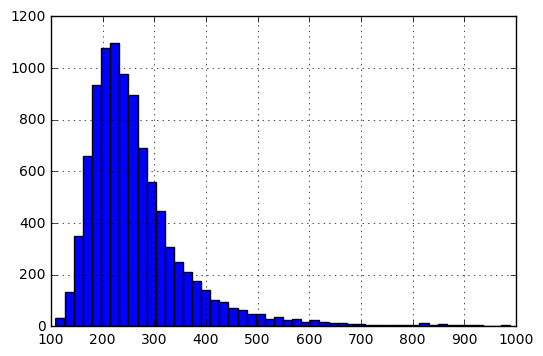

In [34]:
# remove outliers
df_filtered = df[df['latency'] <=1000]

# plot distribution chart
%matplotlib inline
df_filtered['latency'].hist(bins=50)

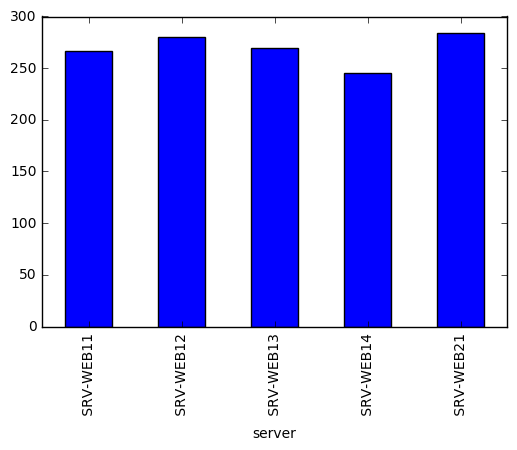

In [39]:
# are the different servers different in latency?
df_filtered.groupby(df['server'])['latency'].mean().plot(kind='bar')

## Load balancing

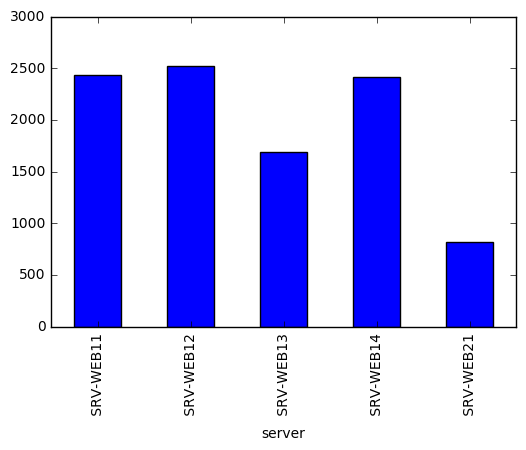

In [41]:
# do the different hosts receive a similar number of requests?
df.groupby(df['server'])['datetime'].count().plot(kind='bar')

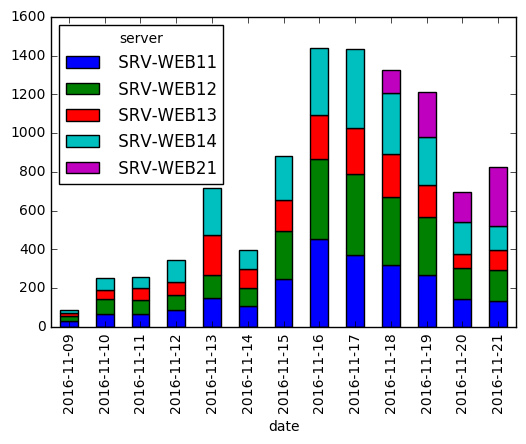

In [53]:
# load distribution over different days
df.groupby(['date', 'server'])['datetime'].count().unstack().plot(kind='bar', stacked=True)

## Time series of latency

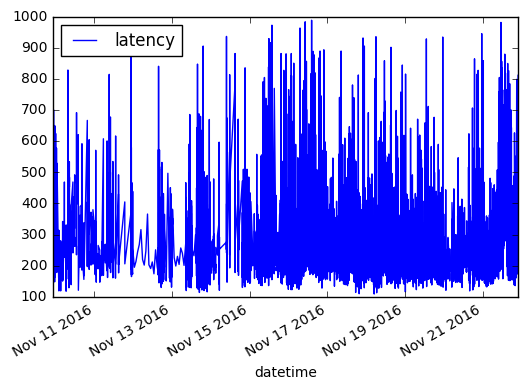

In [42]:
# now plot latency over time
myplot = df_filtered.plot( x='datetime', y='latency')

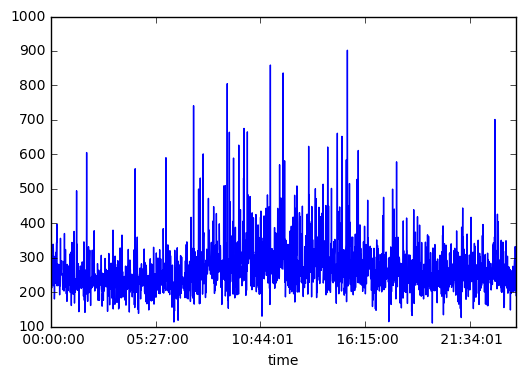

In [43]:
# does latency change at different times of the day?
hourly_latency=df_filtered.groupby(df_filtered['time'])['latency'].mean()
myplot2 = hourly_latency.plot(x='time', y='latency')